In [1]:
import torch
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn

In [2]:
n_pts=500
X, y=datasets.make_circles(n_samples=n_pts, random_state=123, noise=0.1, factor=0.2)
x_data=torch.Tensor(X)#converting them to tensors
y_data=torch.Tensor(y.reshape(500, 1))#reshaping the y  for later use

In [3]:
def scatter_plot():
    plt.scatter(X[y==0, 0], X[y==0, 1])# region of the dataset i.e cluster 1
    plt.scatter(X[y==1, 0], X[y==1, 1])# region of the dataset i.e cluster 2

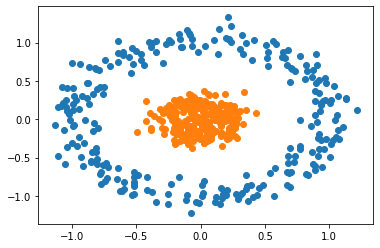

In [4]:
scatter_plot()

In [5]:
class Model(nn.Module):
    def __init__(self, input_size, H1, output_size):
        super().__init__()
        self.linear=nn.Linear(input_size, H1)
        self.linear2=nn.Linear(H1, output_size)
    
    def forward(self, x):
        x=torch.sigmoid(self.linear(x))
        x=torch.sigmoid(self.linear2(x))
        return x
    
    def predict(self, x):
        pred=self.forward(x)
        if(pred>=0.5):
            return 1
        else:
            return 0

In [6]:
torch.manual_seed(2)
model=Model(2, 4, 1) #inp, hiddenlayer, outputlayers
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683],
        [ 0.1939, -0.0361],
        [ 0.3021,  0.1683],
        [-0.0813, -0.5717]], requires_grad=True), Parameter containing:
tensor([ 0.1614, -0.6260,  0.0929,  0.0470], requires_grad=True), Parameter containing:
tensor([[-0.1099,  0.4088,  0.0334,  0.2073]], requires_grad=True), Parameter containing:
tensor([0.2116], requires_grad=True)]


In [7]:
criterion=nn.BCELoss()
optimizer=torch.optim.Adam(model.parameters(), lr=0.1)

In [8]:
epochs=1000
losses=[]
for i in range(epochs):
    y_pred=model.forward(x_data)
    loss=criterion(y_pred, y_data)
    print("epochs:", i, "loss:", loss.item())
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epochs: 0 loss: 0.7148522138595581
epochs: 1 loss: 0.6947312355041504
epochs: 2 loss: 0.6955161094665527
epochs: 3 loss: 0.7014896273612976
epochs: 4 loss: 0.7013992667198181
epochs: 5 loss: 0.697472095489502
epochs: 6 loss: 0.6939275860786438
epochs: 7 loss: 0.6928625106811523
epochs: 8 loss: 0.693941593170166
epochs: 9 loss: 0.6954426765441895
epochs: 10 loss: 0.6958808302879333
epochs: 11 loss: 0.6949241757392883
epochs: 12 loss: 0.693157970905304
epochs: 13 loss: 0.6914014220237732
epochs: 14 loss: 0.6901755332946777
epochs: 15 loss: 0.6894775629043579
epochs: 16 loss: 0.6888664364814758
epochs: 17 loss: 0.6877952814102173
epochs: 18 loss: 0.6859349608421326
epochs: 19 loss: 0.6832882165908813
epochs: 20 loss: 0.6800878047943115
epochs: 21 loss: 0.6766111254692078
epochs: 22 loss: 0.6730254292488098
epochs: 23 loss: 0.6693330407142639
epochs: 24 loss: 0.6653968095779419
epochs: 25 loss: 0.661038875579834
epochs: 26 loss: 0.6561349034309387
epochs: 27 loss: 0.6506633162498474
epochs

epochs: 219 loss: 0.014996864832937717
epochs: 220 loss: 0.014898362569510937
epochs: 221 loss: 0.014800977893173695
epochs: 222 loss: 0.014704744331538677
epochs: 223 loss: 0.014609632082283497
epochs: 224 loss: 0.014515601098537445
epochs: 225 loss: 0.014422638341784477
epochs: 226 loss: 0.01433073915541172
epochs: 227 loss: 0.014239891432225704
epochs: 228 loss: 0.014150053262710571
epochs: 229 loss: 0.014061213470995426
epochs: 230 loss: 0.013973348774015903
epochs: 231 loss: 0.013886467553675175
epochs: 232 loss: 0.013800544664263725
epochs: 233 loss: 0.013715539127588272
epochs: 234 loss: 0.013631454668939114
epochs: 235 loss: 0.013548278249800205
epochs: 236 loss: 0.013465994969010353
epochs: 237 loss: 0.013384588994085789
epochs: 238 loss: 0.013304037041962147
epochs: 239 loss: 0.013224339112639427
epochs: 240 loss: 0.01314547099173069
epochs: 241 loss: 0.013067422434687614
epochs: 242 loss: 0.012990184128284454
epochs: 243 loss: 0.012913740240037441
epochs: 244 loss: 0.0128380

epochs: 429 loss: 0.005667377263307571
epochs: 430 loss: 0.00564763555303216
epochs: 431 loss: 0.005628005601465702
epochs: 432 loss: 0.0056084878742694855
epochs: 433 loss: 0.005589073523879051
epochs: 434 loss: 0.005569775588810444
epochs: 435 loss: 0.005550574045628309
epochs: 436 loss: 0.0055314782075583935
epochs: 437 loss: 0.005512498319149017
epochs: 438 loss: 0.005493616685271263
epochs: 439 loss: 0.005474843084812164
epochs: 440 loss: 0.005456171464174986
epochs: 441 loss: 0.005437599495053291
epochs: 442 loss: 0.005419132299721241
epochs: 443 loss: 0.005400773603469133
epochs: 444 loss: 0.005382506176829338
epochs: 445 loss: 0.0053643397986888885
epochs: 446 loss: 0.005346276797354221
epochs: 447 loss: 0.005328310187906027
epochs: 448 loss: 0.00531043903902173
epochs: 449 loss: 0.005292668007314205
epochs: 450 loss: 0.005274994298815727
epochs: 451 loss: 0.005257412791252136
epochs: 452 loss: 0.005239939317107201
epochs: 453 loss: 0.005222547799348831
epochs: 454 loss: 0.0052

epochs: 637 loss: 0.0031378234270960093
epochs: 638 loss: 0.0031305630691349506
epochs: 639 loss: 0.0031233266927301884
epochs: 640 loss: 0.003116127336397767
epochs: 641 loss: 0.003108949400484562
epochs: 642 loss: 0.0031018054578453302
epochs: 643 loss: 0.003094680141657591
epochs: 644 loss: 0.003087590215727687
epochs: 645 loss: 0.0030805272981524467
epochs: 646 loss: 0.003073490457609296
epochs: 647 loss: 0.003066481091082096
epochs: 648 loss: 0.0030595005955547094
epochs: 649 loss: 0.0030525452457368374
epochs: 650 loss: 0.0030456159729510546
epochs: 651 loss: 0.0030387139413505793
epochs: 652 loss: 0.003031840780749917
epochs: 653 loss: 0.0030249920673668385
epochs: 654 loss: 0.0030181705951690674
epochs: 655 loss: 0.0030113777611404657
epochs: 656 loss: 0.0030046061147004366
epochs: 657 loss: 0.002997863804921508
epochs: 658 loss: 0.0029911494348198175
epochs: 659 loss: 0.002984453924000263
epochs: 660 loss: 0.0029777877498418093
epochs: 661 loss: 0.0029711464885622263
epochs: 6

epochs: 844 loss: 0.0020705927163362503
epochs: 845 loss: 0.002066947752609849
epochs: 846 loss: 0.0020633076783269644
epochs: 847 loss: 0.0020596797112375498
epochs: 848 loss: 0.002056065946817398
epochs: 849 loss: 0.002052456373348832
epochs: 850 loss: 0.002048859605565667
epochs: 851 loss: 0.002045274246484041
epochs: 852 loss: 0.002041695872321725
epochs: 853 loss: 0.002038132632151246
epochs: 854 loss: 0.002034576144069433
epochs: 855 loss: 0.0020310278050601482
epochs: 856 loss: 0.00202749390155077
epochs: 857 loss: 0.002023964188992977
epochs: 858 loss: 0.002020445419475436
epochs: 859 loss: 0.0020169373601675034
epochs: 860 loss: 0.0020134372171014547
epochs: 861 loss: 0.0020099519751966
epochs: 862 loss: 0.002006474882364273
epochs: 863 loss: 0.0020030050072818995
epochs: 864 loss: 0.0019995435141026974
epochs: 865 loss: 0.0019960931967943907
epochs: 866 loss: 0.0019926547538489103
epochs: 867 loss: 0.001989224459975958
epochs: 868 loss: 0.0019858023151755333
epochs: 869 loss:

Text(0.5, 0, 'epochs')

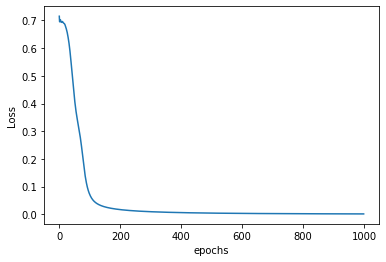

In [10]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epochs')

In [31]:
def plot_decision_boundary(X, y):
    x_span=np.linspace(min(X[:, 0]) -0.25, max(X[:, 0])+0.25)#creating one d array in the range of x axis lgt for test
    y_span=np.linspace(min(X[:, 1]) -0.25, max(X[:, 1])+0.25)#creating one d array in the range of  y axiz lgt for test
    xx, yy= np.meshgrid(x_span, y_span) #return 2d 50*50 matrix, as in the  main dataset
    grid=torch.Tensor(np.c_[xx.ravel(), yy.ravel()])#for converting them to one d
    pred_func=model.forward(grid)
    z=pred_func.view(xx.shape).detach().numpy()#reshape it to the shapes of xx and yy to plot them clearly
    plt.contourf(xx, yy, z)

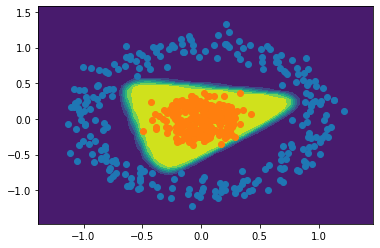

In [32]:
plot_decision_boundary(X, y)
scatter_plot()

prediction is 1


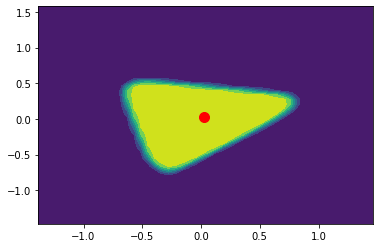

In [34]:
x=0.025
y=0.025
point=torch.Tensor([x, y])
prediction=model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color='red')
print("prediction is", prediction)
plot_decision_boundary(X, y)